In [173]:
import pandas as pd
import matplotlib.pyplot as plt

In [174]:

df_executor = pd.read_excel('data/executor.xlsx' )
df_streams =  pd.read_excel('data/parallelstream.xlsx')
df_semaphore =  pd.read_excel('data/semaphore.xlsx')
df_syncrhonizedBlocks =  pd.read_excel('data/synchronizedblocks.xlsx')
df_basic = pd.read_excel('data/basic.xlsx')

df = pd.read_excel('data/vectorized_atomic_basic.xlsx')  
df_vectorized = df[df['Algorythm'] == 'Vectorized']
df_atomic = df[df['Algorythm'] == 'Atomic']

## Execution Time Comparison

In [175]:
df_executor_filtered = df_executor[df_executor['NumThreads'] == 16]
df_parallel_filtered = df_streams[df_streams['numThreads'] == 16]
df_semaphore_filtered = df_semaphore[df_semaphore['Threads'] == 16]
df_syncrhonizedBlocks_filtered = df_syncrhonizedBlocks[df_syncrhonizedBlocks['Threads'] == 16]

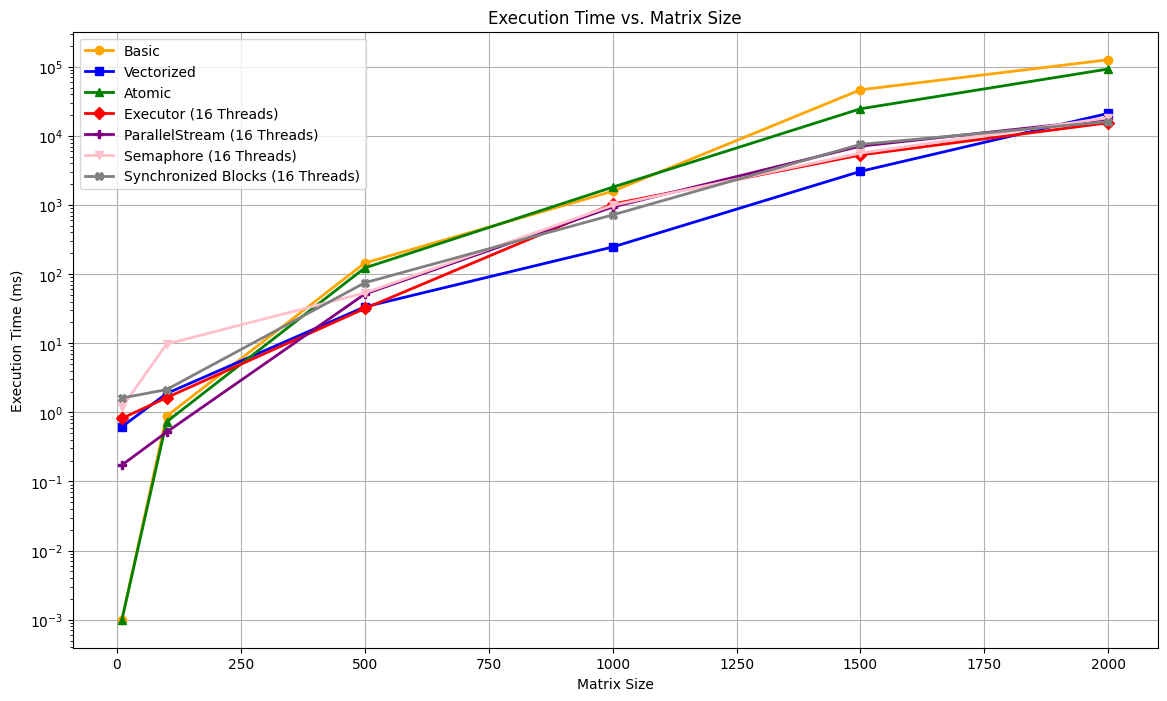

In [176]:

plt.figure(figsize=(14, 8))
plt.plot(df_basic['Size'], df_basic['Execution Time Basic'], marker='o', label='Basic', linewidth=2, color='orange')
plt.plot(df_vectorized['Size'], df_vectorized['Execution Time'], marker='s', label='Vectorized', linewidth=2, color='blue')
plt.plot(df_atomic['Size'], df_atomic['Execution Time'], marker='^', label='Atomic', linewidth=2, color='green')
plt.plot(df_executor_filtered['Size'], df_executor_filtered['Execution Time Executor'], marker='D', label='Executor (16 Threads)', linewidth=2, color='red')
plt.plot(df_parallel_filtered['Size'], df_parallel_filtered['Execution Time Parallel Stream(ms)'], marker='P', label='ParallelStream (16 Threads)', linewidth=2, color='purple')
plt.plot(df_semaphore_filtered['Matrix Size'], df_semaphore_filtered['ExecutionTime(ms/op)'], marker='v', label='Semaphore (16 Threads)', linewidth=2, color='pink')
plt.plot(df_syncrhonizedBlocks_filtered['Matrix Size (n)'], df_syncrhonizedBlocks_filtered['Execution Time (ms/op)'], marker='X', label='Synchronized Blocks (16 Threads)', linewidth=2, color='gray')

plt.title('Execution Time vs. Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (ms)')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

## SpeedUp

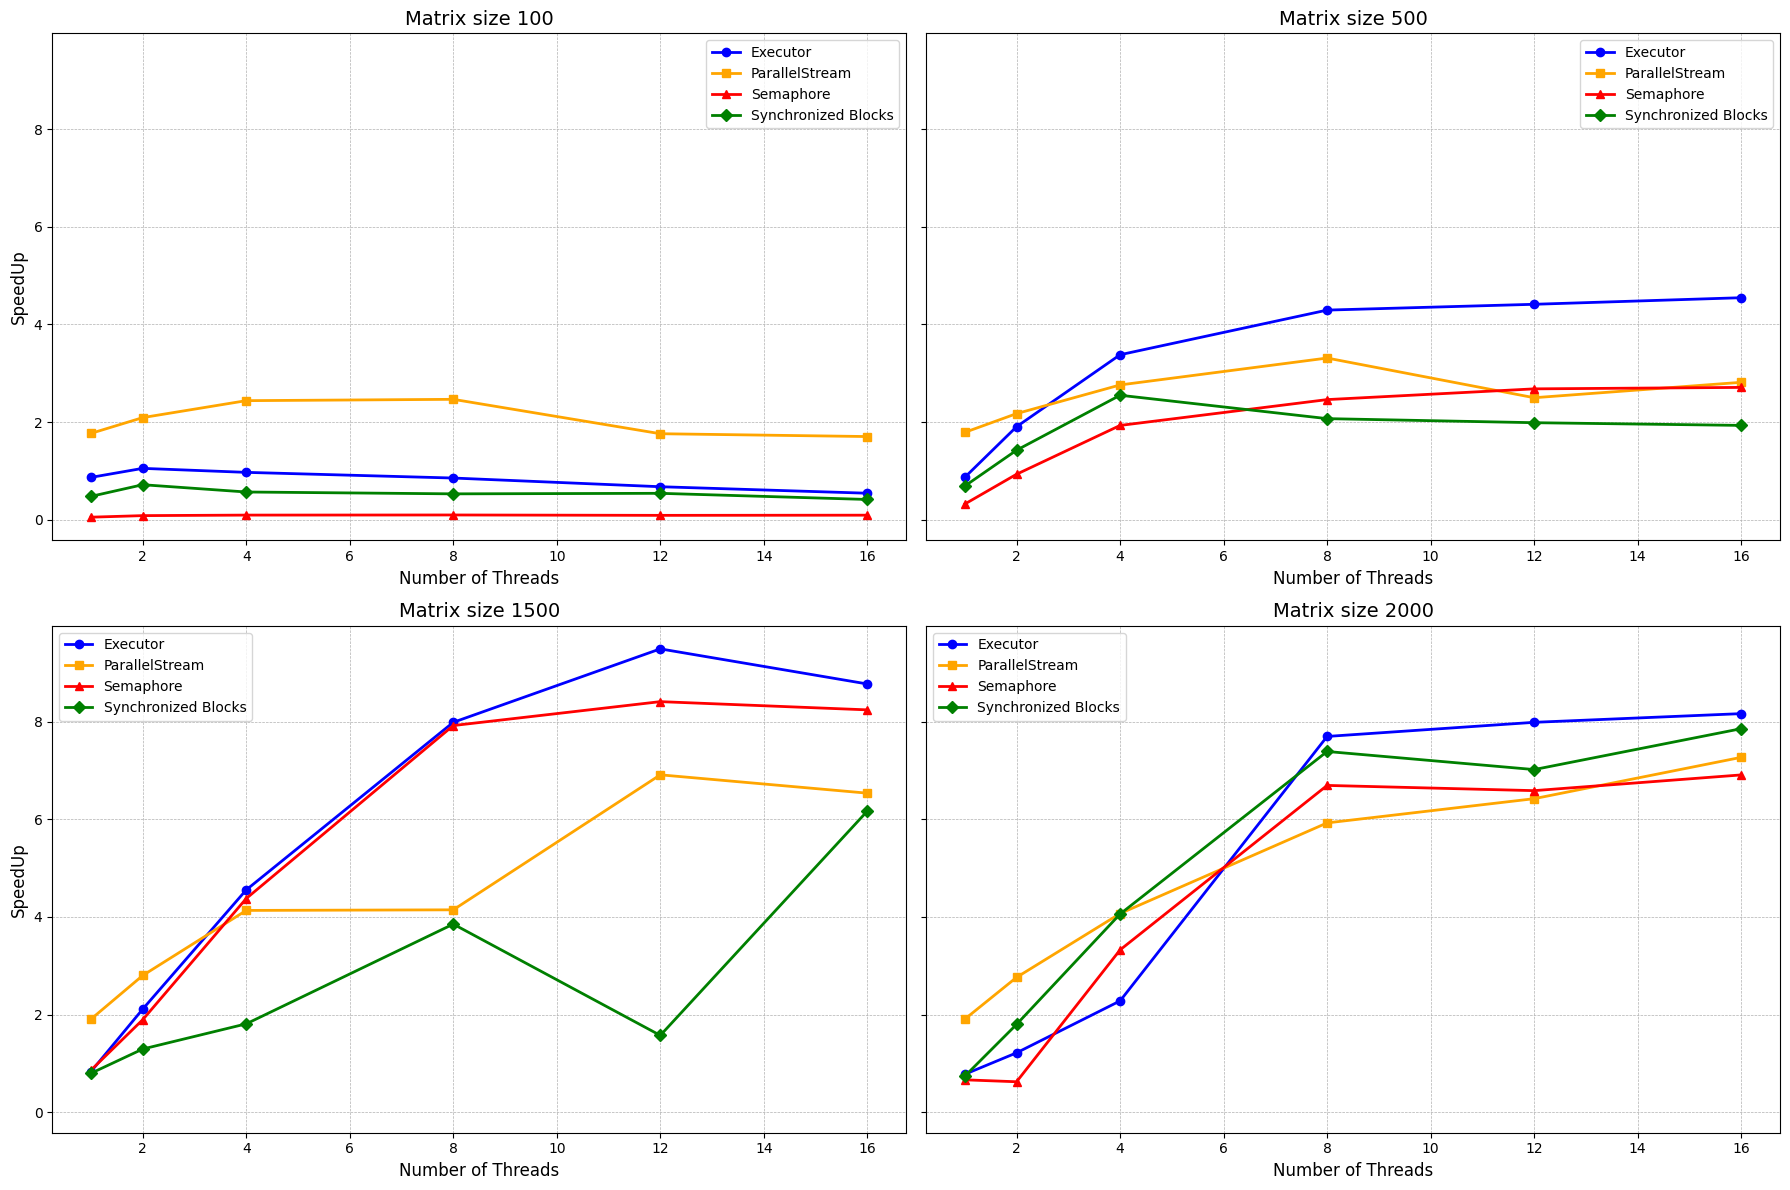

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_sizes = [100, 500, 1500, 2000]
df_executor_filtered = df_executor[df_executor['Size'].isin(filtered_sizes)]
df_parallel_filtered = df_streams[df_streams['Size'].isin(filtered_sizes)]
df_semaphore_filtered= df_semaphore[df_semaphore['Matrix Size'].isin(filtered_sizes)]
df_synchonizedblocks_filtered= df_syncrhonizedBlocks[df_syncrhonizedBlocks['Matrix Size (n)'].isin(filtered_sizes)]


fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)  

axes = axes.flatten()

for i, size in enumerate(filtered_sizes):
    ax = axes[i]
    
    data_executor = df_executor_filtered[df_executor_filtered['Size'] == size]
    data_parallel = df_parallel_filtered[df_parallel_filtered['Size'] == size]
    data_semaphore = df_semaphore_filtered[df_semaphore_filtered['Matrix Size'] == size]
    data_synchonizedblocks = df_synchonizedblocks_filtered[df_synchonizedblocks_filtered['Matrix Size (n)'] == size]
    
    ax.plot(data_executor['NumThreads'], data_executor['SpeedUp'], marker='o', label='Executor', color='blue', linewidth=2)
    
    ax.plot(data_parallel['numThreads'], data_parallel['SpeedUp'], marker='s', label='ParallelStream', color='orange', linewidth=2)
    
    ax.plot(data_semaphore['Threads'], data_semaphore['SpeedUp'], marker='^', label='Semaphore', color='red', linewidth=2)
    
    ax.plot(data_synchonizedblocks['Threads'], data_synchonizedblocks['SpeedUp'], marker='D', label='Synchronized Blocks', color='green', linewidth=2)
    
    ax.set_title(f"Matrix size {size}", fontsize=14)
    ax.set_xlabel("Number of Threads", fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    
    ax.legend(fontsize=10, loc='best')

axes[0].set_ylabel("SpeedUp", fontsize=12)
axes[2].set_ylabel("SpeedUp", fontsize=12)

plt.tight_layout()
plt.show()


## Efficiency

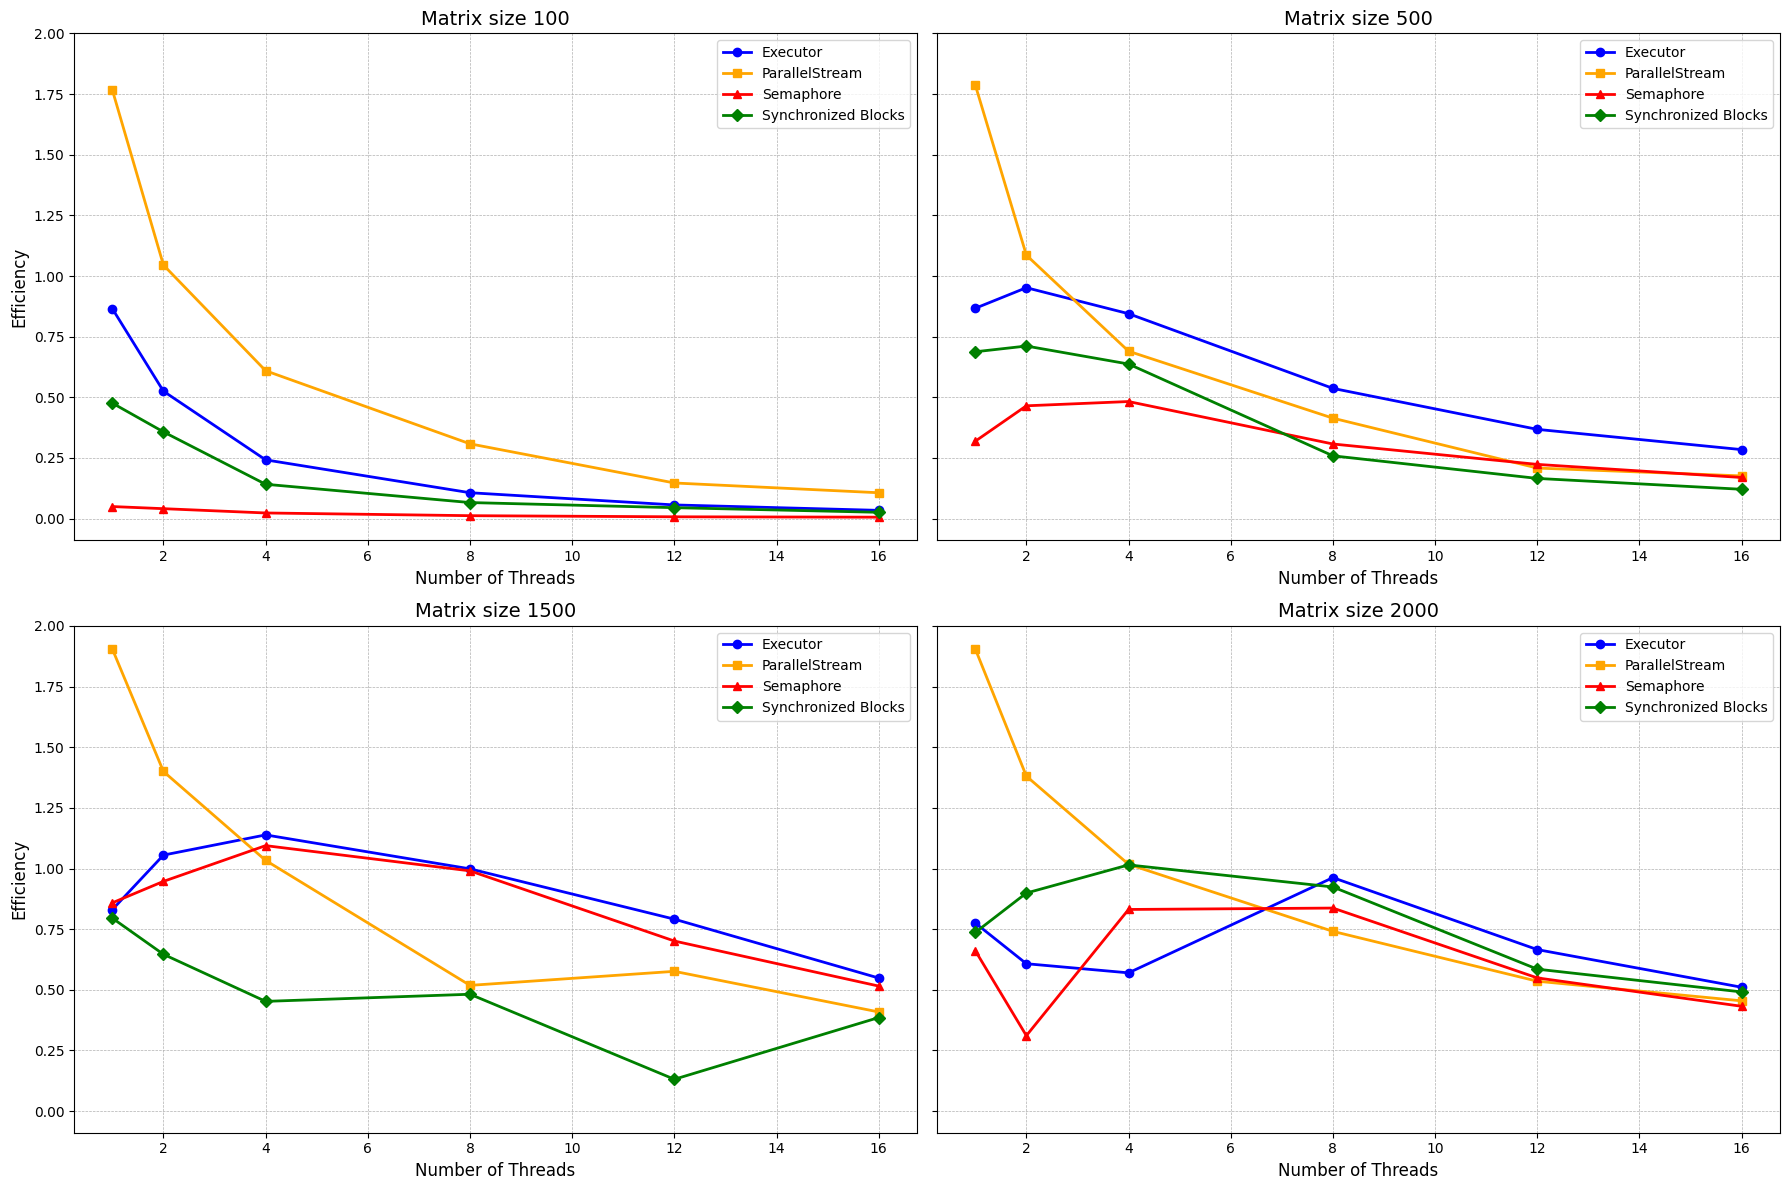

In [178]:

filtered_sizes = [100, 500, 1500, 2000]
df_executor_filtered = df_executor[df_executor['Size'].isin(filtered_sizes)]
df_parallel_filtered = df_streams[df_streams['Size'].isin(filtered_sizes)]
df_semaphore_filtered= df_semaphore[df_semaphore['Matrix Size'].isin(filtered_sizes)]
df_synchonizedblocks_filtered= df_syncrhonizedBlocks[df_syncrhonizedBlocks['Matrix Size (n)'].isin(filtered_sizes)]


fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)  


axes = axes.flatten()

for i, size in enumerate(filtered_sizes):
    ax = axes[i]
    
    
    data_executor = df_executor_filtered[df_executor_filtered['Size'] == size]
    data_parallel = df_parallel_filtered[df_parallel_filtered['Size'] == size]
    data_semaphore = df_semaphore_filtered[df_semaphore_filtered['Matrix Size'] == size]
    data_synchonizedblocks = df_synchonizedblocks_filtered[df_synchonizedblocks_filtered['Matrix Size (n)'] == size]
    
    ax.plot(data_executor['NumThreads'], data_executor['Efficiency'], marker='o', label='Executor', color='blue', linewidth=2)
    
    ax.plot(data_parallel['numThreads'], data_parallel['Efficiency'], marker='s', label='ParallelStream', color='orange', linewidth=2)
    
    ax.plot(data_semaphore['Threads'], data_semaphore['Eficiency'], marker='^', label='Semaphore', color='red', linewidth=2)
    
    ax.plot(data_synchonizedblocks['Threads'], data_synchonizedblocks['Efficiency'], marker='D', label='Synchronized Blocks', color='green', linewidth=2)
    
    ax.set_title(f"Matrix size {size}", fontsize=14)
    ax.set_xlabel("Number of Threads", fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    
    ax.legend(fontsize=10, loc='best')

axes[0].set_ylabel("Efficiency", fontsize=12)
axes[2].set_ylabel("Efficiency", fontsize=12)

plt.tight_layout()
plt.show()


## SpeedUp Vectorized and Atomic

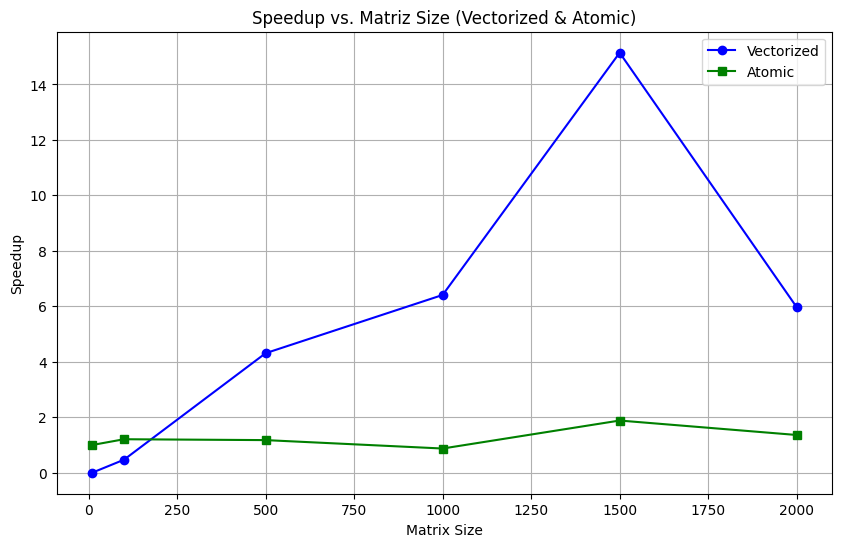

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(df_vectorized['Size'], df_vectorized['SpeedUp'], marker='o', label='Vectorized', color='b')
plt.plot(df_atomic['Size'], df_atomic['SpeedUp'], marker='s', label='Atomic', color='g')
plt.title('Speedup vs. Matriz Size (Vectorized & Atomic)')
plt.xlabel('Matrix Size')
plt.ylabel('Speedup')
plt.grid(True)
plt.legend()
plt.show()


## Memory Usage

In [180]:
df_executor_filtered = df_executor[df_executor['NumThreads'] == 16]
df_parallel_filtered = df_streams[df_streams['numThreads'] == 16]
df_semaphore_filtered = df_semaphore[df_semaphore['Threads'] == 16]
df_syncrhonizedBlocks_filtered = df_syncrhonizedBlocks[df_syncrhonizedBlocks['Threads'] == 16]

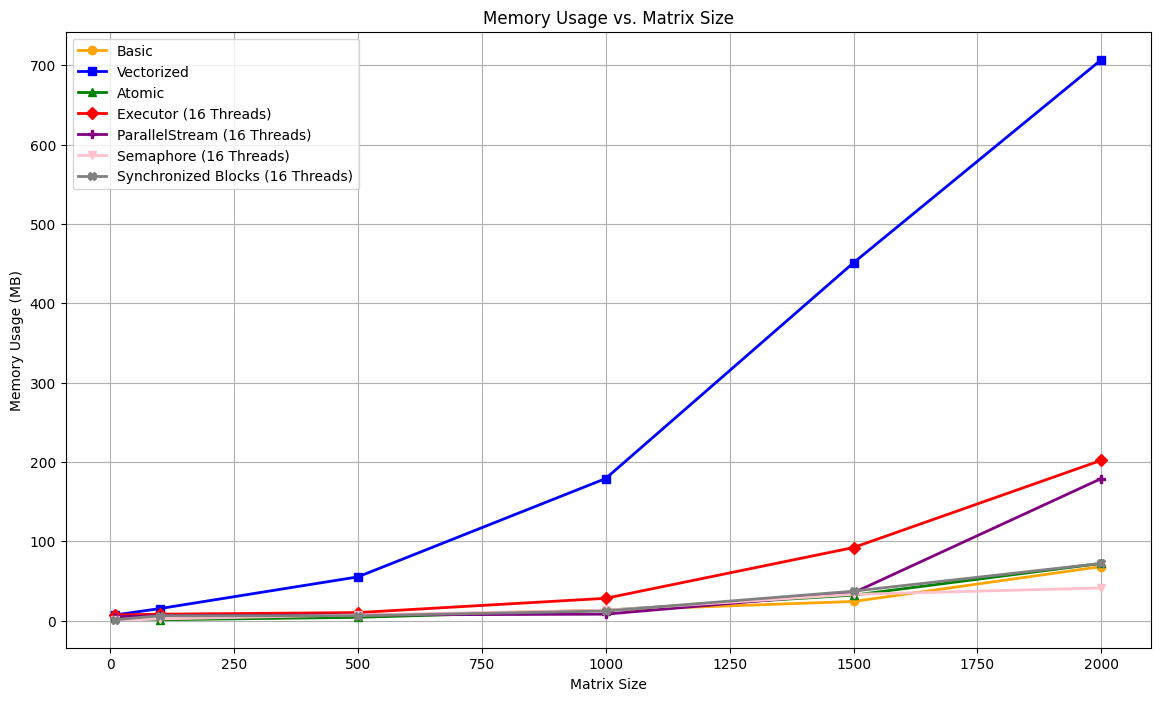

In [181]:
plt.figure(figsize=(14, 8))
plt.plot(df_basic['Size'], df_basic['Memory Usage Basic (MB)'], marker='o', label='Basic', linewidth=2, color='orange')
plt.plot(df_vectorized['Size'], df_vectorized['MemoryUsage'], marker='s', label='Vectorized', linewidth=2, color='blue')
plt.plot(df_atomic['Size'], df_atomic['MemoryUsage'], marker='^', label='Atomic', linewidth=2, color='green')
plt.plot(df_executor_filtered['Size'], df_executor_filtered['Memory Usage Executor (MB)'], marker='D', label='Executor (16 Threads)', linewidth=2, color='red')
plt.plot(df_parallel_filtered['Size'], df_parallel_filtered['Memory Parallel Stream(MB)'], marker='P', label='ParallelStream (16 Threads)', linewidth=2, color='purple')
plt.plot(df_semaphore_filtered['Matrix Size'], df_semaphore_filtered['Memory Used Semaphore (MB)'], marker='v', label='Semaphore (16 Threads)', linewidth=2, color='pink')
plt.plot(df_syncrhonizedBlocks_filtered['Matrix Size (n)'], df_syncrhonizedBlocks_filtered['Memory Usage (MB)'], marker='X', label='Synchronized Blocks (16 Threads)', linewidth=2, color='gray')
plt.title('Memory Usage vs. Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Memory Usage (MB)')
plt.grid(True)
plt.legend()
plt.show()